# **Primeros modelos de Machine Learning**

En la clase de hoy comenzaremos a desarrollar nuestros dos primeros modelos de ML. Abordaremos uno para *clasificación* y otro para *regresión*. A lo largo de la cursada, iremos creando más modelos basados en otros algoritmos para ambas subdivisiones del **aprendizaje supervisado**. Después, encararemos el aprendizaje no supervisado.

Veremos una ***regresión lineal*** (para problemas de regresión) en la Práctica_01 y una ***regresión logística*** (aunque su nombre pueda generar confusión al principio, este algoritmo es propio de los problemas de clasificación) en la Práctica_02.

## `Flujo de trabajo en Scikit-Learn`

Para poder implementar nuestros modelos en ML, utilizaremos mayoritariamente la librería Scikit-Learn. Es importante que la descarguen para que puedan ejecutar este notebook. Dejamos [aquí](https://scikit-learn.org/stable/) la documentación. Recomendamos que la vayan viendo para familiarizarse con ella.

Para trabajar con ML, lo que estaremos haciendo habitualmente no es otra cosa que usar clases, objetos y métodos de esos objetos.

<img src="assets/SC-L.jpg"
style = "width:800px; height:300px">

En una primera etapa, instanciamos una clase -nuestro modelo de ML-. Luego, entrenamos y predecimos -ambos son métodos de la clase que instanciamos-.

## **Regresión lineal**

Como vimos en la clase, los problemas de regresión son aquellos que tienen como etiqueta de salida una variable numérica.
Una de las formas de poder predecir una etiqueta de estas características es con una regresión lineal. Esta, a su vez, puede ser simple o múltiple, dependiendo de la cantidad de atributos -***X***- que tengamos en nuestro dataset.

Comenzaremos trabajando con una regresión lineal de un solo atributo, partiendo de la conocida ecuación de una recta:

$ Y = mX + b $

m : pendiente

b : ordenada al origen

Ahora bien, para modelar en el mundo real, un mundo predominado por los fenómenos aleatorios y bastante poco determinístico, vamos a incluir lo que se llama un término de error $\epsilon$. Este término le agregará lo que comunmente se conoce como "ruido", el cuál representa información que está presente pero que no es determinante a la hora de encontrar relaciones causales. Reescribimos entonces:

$ Y = mX + b + \epsilon$

donde ahora $\epsilon$ es un término de error aleatorio que se distribuye normal con media cero y varianza uno, $\epsilon\sim N(0;1)$

## 1. Regresión lineal simple

En este punto, abordaremos una regresión lineal de un solo atributo

In [112]:
# Importamos las librerías necesarias

import sys
!{sys.executable} -m pip install numpy pandas matplotlib sklearn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A continuación, generaremos un dataset sintético. Este incluirá 500 datos con una relación lineal que seguirá la forma $y = 3x - 2$. Podrán ver que a esta función le estaremos sumando un poco de *ruido* como habíamos dicho antes.

In [113]:
n = 500 # cantidad de datos
X = np.linspace(-2,3,n) #Desde -2 hasta 3, en n=500 saltos
y_real = 3*X - 2 # formula de y = f(x)
e = np.random.randn(n) # e = Ruido = error con distribucion normal f(random).
y = y_real + e # Aquí le agregamos ruido a la función = e . En F(x) = mX + b + e

$Y = mX + b + \epsilon$

Procedemos a graficar, ploteando por un lado los valores reales -en verde- y, por otro, la curva teórica -en rojo-.

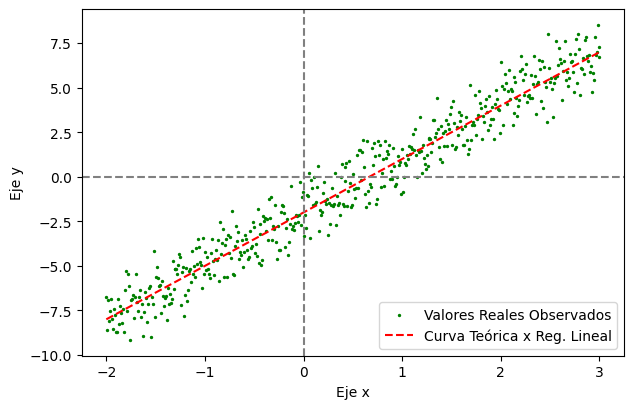

In [114]:
plt.figure(figsize=(7,4.5)) #quiero un tamaño de figura 7 x 4.5
plt.scatter(X,y, s = 2, label= 'Valores Reales Observados', c = "Green") #plt scarrter, grafícame los valores de (X), (y) en puntitos , s(opcional)= tamaño de los puntos en el grafo, label="Etiqueta Grafo"
plt.plot(X, y_real, '--',label ='Curva Teórica x Reg. Lineal', c = 'r') #plt scarrter, grafícame los valores de (X), (y_real), '--' le dice opcionalemnete que en linea --,, c= color line
plt.xlabel('Eje x') # le digo que el eje x posea la leyenda "x"
plt.ylabel('Eje y') # le digo que el eje y posea la leyenda "y"
plt.legend() # Activa las leyendas
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.show() # Muestrame el Grafo!

Vamos a hacerlo primero, de manera manual<br>
<img src="Formula_Regresion_Lineal.jpg" width=200>

In [115]:
a = (n * (X*y).sum() - X.sum() * y.sum()) / (n * (X**2).sum() - X.sum()**2)
print("La pendiente obtenida manualmente es:", a) # Concuerda con la ecuacion de la recta? Si. entonces esta bien.

La pendiente obtenida manualmente es: 3.014310024811144


In [116]:
b = (y.sum() - a * X.sum()) / n
print("La ordenada al orígen obtenida manualmente es:", b) # Concuerda con la ecuacion de la recta? Si. entonces esta bien.

La ordenada al orígen obtenida manualmente es: -1.9422449119358


# Y ahora, usando Scikit-Learn:

In [117]:
from sklearn.linear_model import LinearRegression # Importamos el módulo que contiene el algorimto de regresión lineal

In [118]:
linear_model = LinearRegression() # Instanciamos un objeto de la clase LinearRegression. Aquí estamos creando nuestro modelo predictivo 'linear_model'

In [119]:
# Entrenamos el modelo
linear_model.fit(X.reshape(-1,1), y) # reshape re acomoda para acomodar el array ,paso la matriz a vector... el -, "mantengame la primera dimension de longirud uno" "y meta todos los datos alli el 1...(?)", 

LinearRegression()

In [120]:
# Aquí observamos cómo el modelo ha aprendido de los datos, a partir de la pendiente y la ordenada al origen que calculó:

print('La pendiente obtenida con Sklearn es :', linear_model.coef_) #a = (n * (X*y).sum() - X.sum() * y.sum()) / (n * (X**2).sum() - X.sum()**2) esta haciendo eso
print('La ordenada al origen obtenida con Sklearn es:', linear_model.intercept_)
print(f'el rango es: {linear_model.rank_}')
print(f'matriz singular de : {linear_model.singular_}')
print(f'la ord al origen: {linear_model.intercept_}')


La pendiente obtenida con Sklearn es : [3.01431002]
La ordenada al origen obtenida con Sklearn es: -1.9422449119357992
el rango es: 1
matriz singular de : [32.33947562]
la ord al origen: -1.9422449119357992


En la celda de abajo instanciaremos un modelo de regresión lineal. Para ello, debemos entrenar el modelo y hacer un `train_test_split`.

No te preocupes por no haber visto este concepto todavía, ya lo veremos más en detalle en la clase 3. Por el momento, basta con que sepas que este método divide o separa nuestro set de datos en dos subcojuntos -uno de entrenamiento y el otro de testeo-. 

En el primer subset, se le muestra al modelo los datos de entrada de cada uno de los registros y sus respectivas variables de salida. De esta manera, irá aprendiendo de los datos asociando los valores de ***x*** con su variable de salida ***y*** para cada registro. Mientras que, en el subset de testeo, solamente utilizaremos las variables de entrada para que el modelo vaya realizando sus predicciones. A estas predicciones las compararemos con los valores reales -las etiquetas de salida del subset de testeo- para evaluar cuán bien, o no, está infiriendo nuestro modelo.

In [121]:
from sklearn.model_selection import train_test_split # slpit arrays for training

X = X.reshape(-1,1) # ordeno de manera lineal los datos, lo vuelvo una tira.  Se lo aplico a la variable X para no tener que volver a hacerlo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=230) # Separamos nuestros datos, dejando un 30% para testear de x y y coja el 30% de los datos 
# hice que seleccione datos de entrenamiento. , random_state=230 =seed = semilla P inicializar el modelo aleatorio.

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(350, 1) (350,) (150, 1) (150,)


In [122]:
# la seed es un parametro de entrada que hace funcionar un algoritmo aleatorio, aunque ningun algoritmo es aleatorio es pseudo aleatorio,
# funciones compleas que no son predecibles a la hora de sacar valores aleatorios, la semilla afecta la salida de numeros aleatorios.

De los 500 datos que teníamos en una primera instancia, utilizamos 350 para nuestro subset de entrenamiento y los 150 restantes para testear.

In [123]:
# Entrenamos el modelo

linear_model.fit(X_train, y_train)

LinearRegression()

In [124]:
# Predecimos las etiquetas de salida X, en el subset de entrenamiento, y tambien , en el subset de testeo.
# Para cada una de las instancias...
y_train_pred = linear_model.predict(X_train) # subset de entrenamiento , le digo que prediga en base al subdataset: X_train
y_test_pred = linear_model.predict(X_test) #subset de testeo, le digo que prediga en base al subdataset:  X_test

In [125]:
# Aquí observamos cómo el modelo ha aprendido de los datos, a partir de la pendiente y 
#la ordenada al origen que calculó

print('La pendiente es :', linear_model.coef_)
print('La ordenada al origen es:', linear_model.intercept_)
print(f'el rango es: {linear_model.rank_}')
print(f'matriz singular de : {linear_model.singular_}')


La pendiente es : [2.99898548]
La ordenada al origen es: -1.8874346994784612
el rango es: 1
matriz singular de : [27.09787003]


Los modelos diseñados para problemas de regresión buscan obtener la curva que mejor aproxime los datos, a través de la minimización de los errores que se determinan entre los valores predichos ($\hat{y}$) y los observados ($y$).

Vamos a ver la curva que calculó este regresor que estamos utilizando.

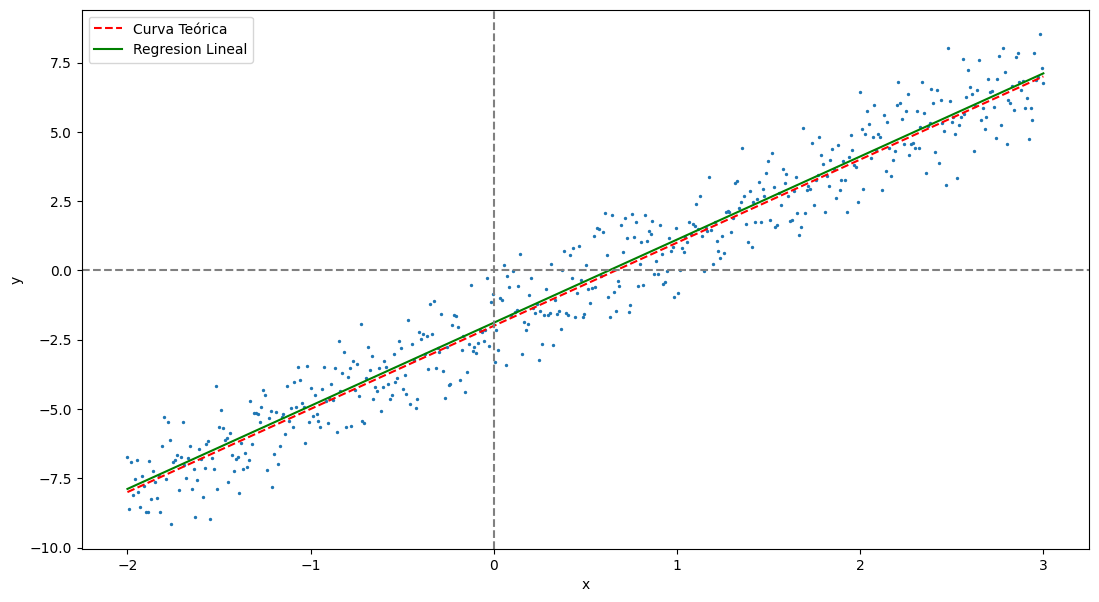

In [126]:
plt.figure(figsize = (13,7))

plt.scatter(X,y, s = 2)
plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'g')

plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()


Podemos observar que nuestro modelo de regresión lineal reproduce con bastante fidelidad la curva teórica de nuestros datos

# **Evaluación del modelo:**

En este apartado, avanzaremos en una etapa esencial dentro del flujo de Machine Learning. Esta consiste en la evaluación de los modelos que instanciemos y utilicemos para predecir. En la clase 3 profunidizaremos más sobre este aspecto de evaluación de modelos.

Para esta práctica, enunciaremos brevemente las métricas de evaluación más empleadas en problemas de regresión.

Evaluar un modelo no es otra cosa que cuantificar su performance. Es decir, poder determinar la calidad de sus predicciones.

Partimos del error entre la etiqueta real *Y* y la predicción del modelo *Y'*. En algunos casos, nuestro regresor sobreestimará el valor de la predicción, por lo que el error será positivo -por ejemplo, si el valor de la etiqueta real es 5 y el modelo predijo que era 6, el error será +1-. En otros casos, el regresor subestimará el valor de la predicción, por lo que el error será negativo -si el valor de la etiqueta real es 5 y el modelo predijo que era 4, el error será -1-.

El error de nuestro regresor estará relacionado con la suma de los errores sobre todas las instancias. Habiendo dicho todo lo anterior, queda claro que podría pasar que los errores se compensen y nos engañemos (si sumamos un error en una instancia que es negativo con el error de otra instancia que es positivo, corremos el riesgo de que se anulen).

Para no caer en este escenario, hay diversas soluciones en la aplicabilidad de ciertas métricas de evaluación. Aquí veremos: MAE, MSE y RMSE.

### *MAE (Mean Absolute Error)*

<img src="https://cdn-images-1.medium.com/max/800/1*8DXbECB9pnKxTpIvuVD-vg.png">

Esta métrica suma los valores absolutos de los errores sobre cada isntancia y luego las promedia para obtener el error promedio.

El problema, en este caso, es que el error va a ser mayor cuantas más muestras haya.

### *MSE (Mean Squared Error)*

<img src= "https://pbs.twimg.com/media/Etuc3lBXcAEH7wO.png"
style = "width:375px; height:200px">

Aquí, en lugar de tomar el valor absoluto, tomamos el cuadrado del error.

La desventaja, ahora, es que al estar elevado al cuadrado, el error no tiene la misma magnitud ni unidad que la variable **Y**.

Por ello, se suele aplicar la raíz.

### *RMSE (Root Mean Squared Error)*

<img src= "https://secureservercdn.net/160.153.137.16/70j.58d.myftpupload.com/wp-content/uploads/2019/03/rmse-2.png"
style = "width:375px; height:150px">

Como vemos, esta métrica consiste en aplicarle la raíz cuadrada al MSE.

Tanto MSE y RMSE son más sensibles a los valores atípicos (ya que elevan los errores de cada muestra al cuadrado).

Hay que tener presente que todas estas métricas que vimos miden errores. Con lo cual, a más bajo MAE, MSE o RMSE, mejor regresor. En un caso hipotético de perfección, los errores serán 0.



### *Coeficiente de determinación (R cuadrado)*


<img src= "https://economipedia.com/wp-content/uploads/R-Cuadrado-expresi%C3%B3n-300x192.jpg"
style = "width:300px; height:200px">

Dejamos para al final esta métrica que, al igual que el RMSE, es de las más aplicadas en la materia.

El coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar.

Su valor, a diferencia de las métricas que estuvimos viendo anteriormente, oscila entre 0 y 1.

Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

Cabe destacar, que Scikit-Learn aplica una variante denominada R cuadrado ajustada, en la que los valores obtenidos, sí pueden ser menores a 0, en caso de que el modelo tenga un ajuste a los datos muy bajo:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Raíz del error cuadrático medio en Train: 0.993274261886559. Oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar
Raíz del error cuadrático medio en Test: 1.0072941586146553. Oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar


C:\Users\Luca\AppData\Local\Temp\ipykernel_5944\1995281649.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
C:\Users\Luca\AppData\Local\Temp\ipykernel_5944\1995281649.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

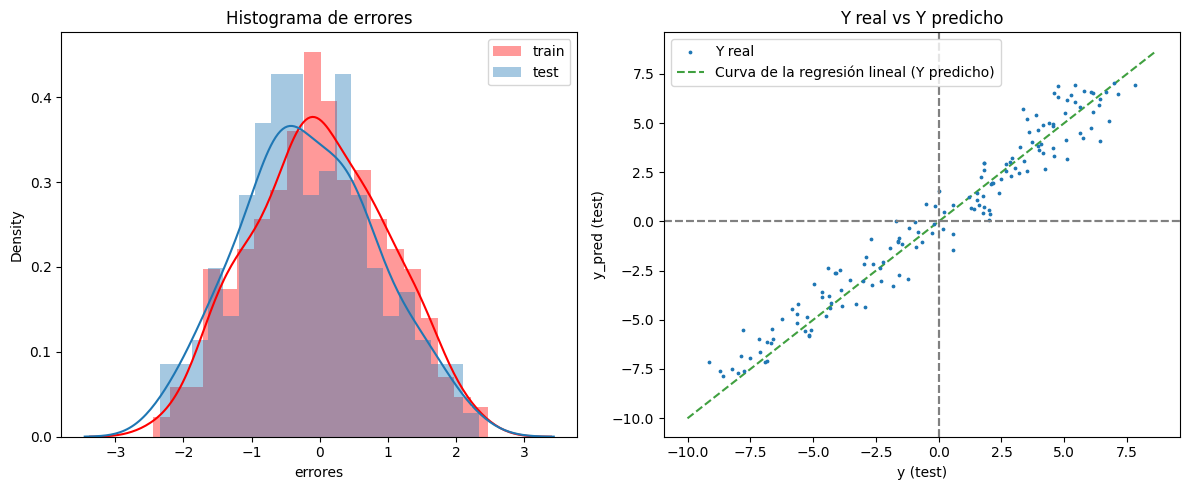

In [127]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # que ignore los errores

from sklearn.metrics import mean_squared_error # importo las metricas


import seaborn as sns

# CALCULO DEL ERRORCUADRÁTICO MEDIO
rmse_train = (mean_squared_error(y_train, y_train_pred, squared = False)) # ERROR CUADRATICO MEDIO MUY pequeño MUY BUENO; muy grande modelo MUY MALO
rmse_test = (mean_squared_error(y_test, y_test_pred, squared = False))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}. Oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}. Oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar')

plt.figure(figsize = (12,5))

# En este subplot, graficamos los histogramas de los errores para el subset de entrenamiento y el de testeo
plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train', color = 'r', kde = True)
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test', kde = True)
plt.xlabel('errores')
plt.legend()

# En este subplot, graficamos los puntos celestes que representan los valores Y reales y la curva en negro que representa la función de regresión lineal que creó nuestro modelo de ML
ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred, s =3, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Curva de la regresión lineal (Y predicho)',c = 'green', linestyle='--')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.tight_layout()
plt.show()

*Ya calculamos el RMSE. Ahora calcularemos el coeficiente de determinación de nuestro modelo*

In [128]:
from sklearn.metrics import r2_score 

r2 = r2_score(y_test, y_test_pred) 
print('El coeficiente de determinación del regresor es:', r2) # calculo el r2


El coeficiente de determinación del regresor es: 0.9494292166331942


Tenemos un R^2 muy cercano a uno, lo que es un indicio de un modelo que predice con bastante fidelidad.

# 2. Regresión lineal múltiple:

Ahora trabajaremos una regresión lineal con dos atributos.

$y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido $\epsilon$.

In [129]:
n = 500
x1 = np.random.rand(n)
x2 = np.random.rand(n)
e2 = np.random.randn(n)
y = -3*x1 + 2*x2 + 4 + e2

No es necesario entender el código de este gráfico tridimensional. Simplemente es para que puedan visualizar cómo son nuestros datos con dos atributos y una variable de salida.

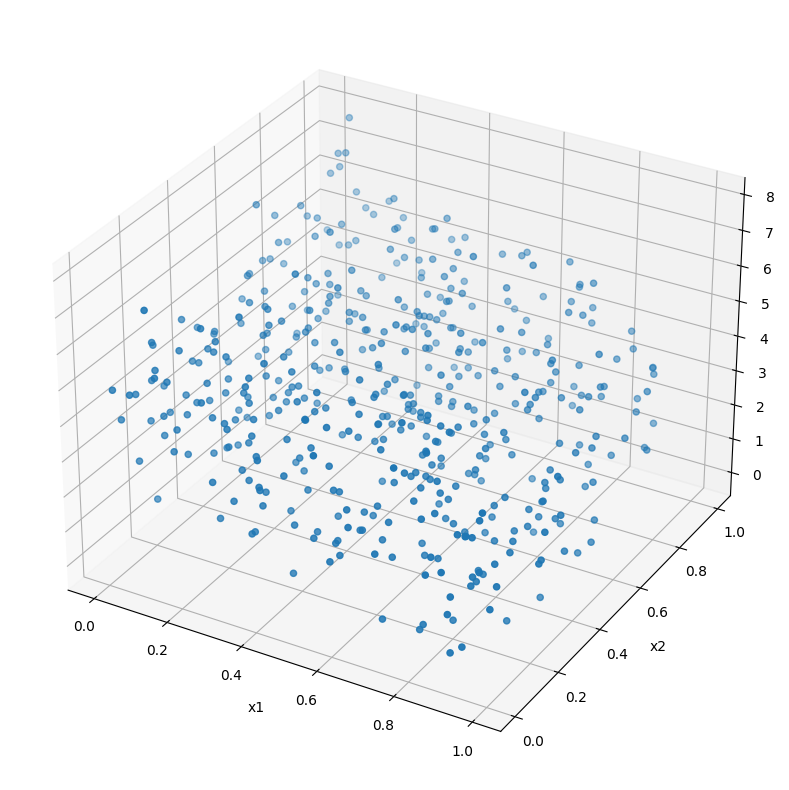

In [130]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_scatter(x1, x2, y, ax=None, fig = None): # def plot_3d_scatter(x, y, z, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (15,10))
        ax = fig.add_subplot(111, projection='3d') # en tres d
    ax.scatter(x1, x2, y) # (x, y, z)

    ax.set_xlabel('x1') # x
    ax.set_ylabel('x2') # y
    ax.set_zlabel('y') # z

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [131]:
# Separamos nuestros datos en entrenamiento y test. X se denota con mayúscula ya que incluye dos atributos

X = np.vstack((x1,x2)).T # X = np.vstack((x,y)).T  #, en funcion de z. # une los datos, en la primer fila x1 y los x2 debajo, algo asi como que los concatena uno debajo del otro. T hace la transpuesta x1|x2 en columnas
#print(X)

"""
En la línea de código "X = np.vstack((x1,x2)).T", 
se está utilizando la función "vstack" de NumPy para apilar verticalmente dos arreglos unidimensionales "x1" y "x2" y crear una matriz bidimensional.

El resultado de "np.vstack((x1,x2))" es una matriz con "x1" y "x2" como sus dos filas. La función "T" transpone la matriz resultante,
convirtiendo las filas en columnas y las columnas en filas, lo que da como resultado una matriz con "x1" y "x2" como sus dos columnas.

Por lo tanto, la variable "X" será una matriz bidimensional con "x1" y "x2" como sus dos columnas.
El número de filas en la matriz dependerá de la longitud de "x1" y "x2", que deben tener la misma longitud para poder apilarlos verticalmente.

"""
#separo en datos de entrenamiento y test mi informacion:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) #shapes de cada uno de los elementos ya separados

(350, 2) (350,) (150, 2) (150,)


In [132]:
# Instanciamos nuestra regresión lineal y la entrenamos
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) #paso los datos de entrenamiento

LinearRegression()

In [133]:
# Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes

print('Las pendientes del modelo de regresión lineal son:', linear_model.coef_) # m1= 3 y m2=2 en la ecuacion
print('La ordenada al origen del modelo de regresión lineal es:', linear_model.intercept_) # 4 era el intercept en la funcion, esta dando ok

Las pendientes del modelo de regresión lineal son: [-2.96791935  1.74578663]
La ordenada al origen del modelo de regresión lineal es: 4.235622491580208


En este caso, la curva que aproxima a los datos ya no es una recta sino una superficie. La función definida abajo nos permite graficarla

In [134]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) #genero los datos de x1
    x2 = np.linspace(x2_min,x2_max,N) #genero los datos de x2
    X1, X2 = np.meshgrid(x1,x2) # organizo en termino de grilla
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T) #predigo los datos y
    Y = y.reshape(X1.shape) # reorganizo
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

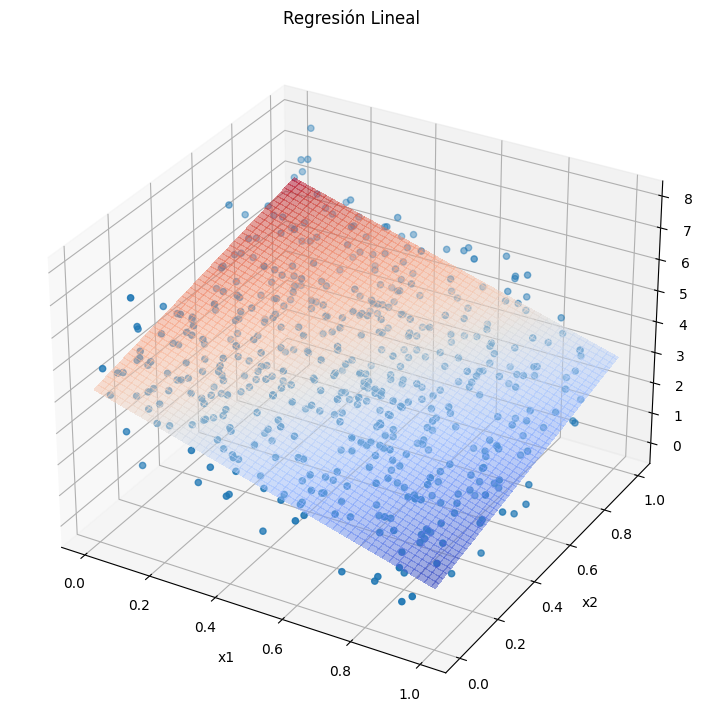

In [135]:
fig = plt.figure(figsize = (30,15))
ax = fig.add_subplot(131, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)

Raíz del error cuadrático medio en Train: 0.9691916773879604
Raíz del error cuadrático medio en Test: 1.0079897929384252


C:\Users\Luca\AppData\Local\Temp\ipykernel_5944\2996658212.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
C:\Users\Luca\AppData\Local\Temp\ipykernel_5944\2996658212.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_test_pred

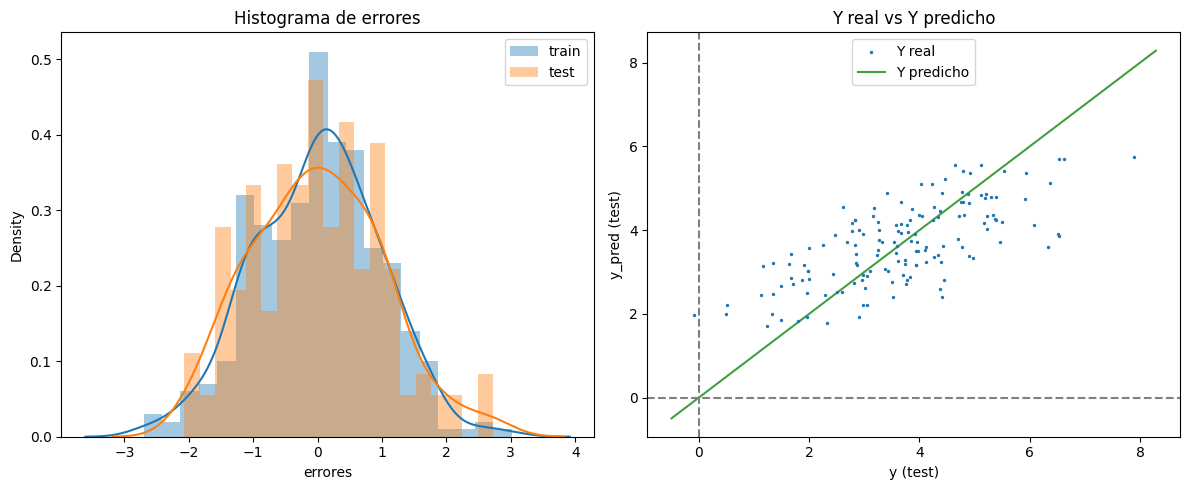

In [136]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
plt.title('Y real vs Y predicho')
ax.scatter(y_test,y_test_pred, s =2, label = 'Y real')
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label = 'Y predicho', c ='green')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.tight_layout()
plt.show()

In [137]:
#falto calcular r2:
r2 = r2_score(y_test, y_test_pred)
print('El error cuadratico es de:', r2)
print()
print("El coeficiente R^2 es una medida de la proporción de la varianza en la variable dependiente")
print("que puede explicarse por la variable independiente. Un valor de R^2 cercano a 1 indica que el modelo es capaz de explicar una gran")
print("cantidad de variabilidad en los datos, mientras que un valor cercano a 0 indica que el modelo no explica bien los datos.")


El error cuadratico es de: 0.4840534956535678

El coeficiente R^2 es una medida de la proporción de la varianza en la variable dependiente
que puede explicarse por la variable independiente. Un valor de R^2 cercano a 1 indica que el modelo es capaz de explicar una gran
cantidad de variabilidad en los datos, mientras que un valor cercano a 0 indica que el modelo no explica bien los datos.


# 3. Regresión lineal con atributos polinómicos:

Aquí tocaremos otro tipo de relación lineal que se puede emplear para problemas de regresión. Ya estamos en presencia de una regresión avanzada que se utiliza para aplicar una regresión lineal a un problema que no es lineal.

Para trabajar con un dataset que tengamos, que no sigue una relación lineal, y convertirlo en un problema lineal, debemos hacer un preprocesamiento de los datos.

Lo que se hace en este punto es agregar más atributos.

Por ejemplo, si tenemos :       $Y = ax $<sup>2</sup> + bx + c 

Lo podemos covertir a un problema lineal de la siguiente manera:           $Y = ax $<sub>1</sub> + bx<sub>2</sub> + c   
donde x<sub>1</sub> = x<sup>2</sup> y x<sub>2</sub> = x

De esta forma, se agregó una nueva dimensión. Debemos decidir hasta qué grado agregar. Desde el punto de vista computacional, el dataset obtenido puede ocupar mucho espacio.


In [138]:
# Procedemos a realizar un ejemplo de aplicación.

n = 300 #trecientos datos
X1 = np.linspace(-1.5,2,n)
y_real = -1.5*X1**4+3*X1**2+1 # funcion que tenemos
e3 = np.random.randn(n) # e = ruido random
y = y_real + e3 # Le agregamos ruido a y.

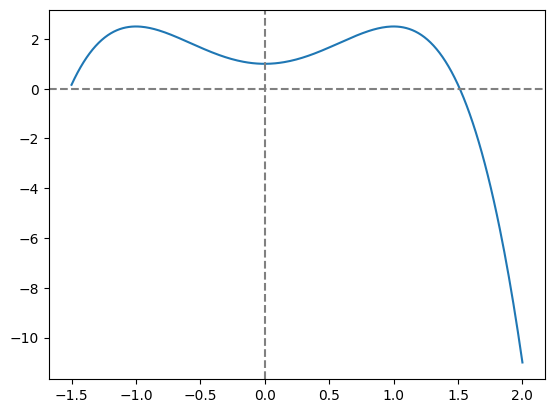

In [139]:
plt.plot(X1,y_real)
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.show()

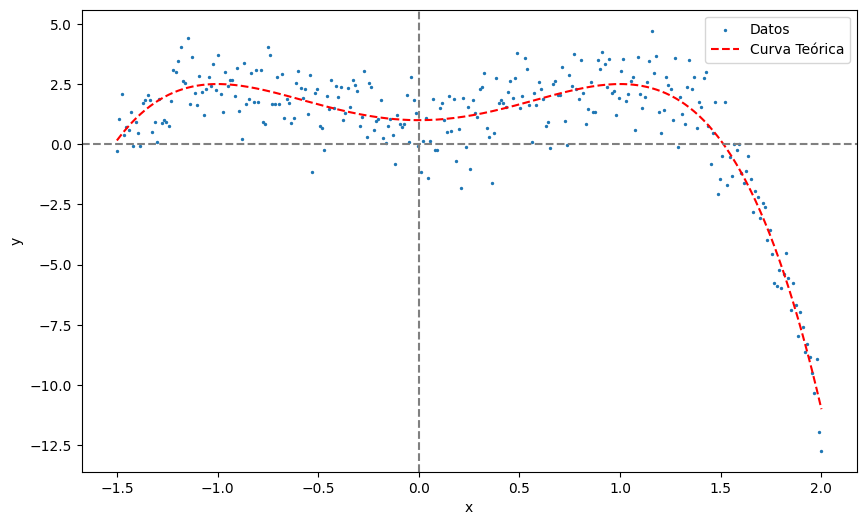

In [140]:
# Graficamos los datos y la curva teórica

plt.figure(figsize= (10,6))
plt.scatter(X1,y, s = 2, label = 'Datos')
plt.plot(X1, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.show()

In [141]:
X

array([[7.30779863e-01, 3.00430435e-01],
       [7.10928741e-01, 7.98063632e-01],
       [5.52374652e-01, 7.51351238e-01],
       [5.68885384e-01, 6.37030590e-01],
       [3.19176342e-01, 3.97379399e-01],
       [8.18258801e-01, 2.24193379e-01],
       [8.29554678e-01, 2.62858478e-01],
       [3.39606857e-01, 9.96981225e-01],
       [4.77957844e-01, 5.70816674e-01],
       [5.94438579e-01, 7.93224904e-02],
       [2.45462041e-01, 1.25730015e-01],
       [6.95194845e-01, 4.03404166e-01],
       [7.27943029e-01, 9.90225062e-01],
       [5.54667521e-01, 4.33741273e-01],
       [6.97324771e-01, 2.30927980e-01],
       [6.20621510e-01, 7.65659095e-01],
       [5.11117786e-01, 3.76493712e-01],
       [9.69612220e-01, 8.07254399e-01],
       [2.95213800e-01, 8.48535478e-01],
       [8.76655835e-01, 5.10458837e-01],
       [9.02250932e-01, 2.90145486e-01],
       [7.34633110e-01, 2.53516963e-01],
       [7.56632358e-01, 5.47594074e-01],
       [5.93287171e-01, 7.21300603e-03],
       [1.498235

In [142]:
X1

array([-1.50000000e+00, -1.48829431e+00, -1.47658863e+00, -1.46488294e+00,
       -1.45317726e+00, -1.44147157e+00, -1.42976589e+00, -1.41806020e+00,
       -1.40635452e+00, -1.39464883e+00, -1.38294314e+00, -1.37123746e+00,
       -1.35953177e+00, -1.34782609e+00, -1.33612040e+00, -1.32441472e+00,
       -1.31270903e+00, -1.30100334e+00, -1.28929766e+00, -1.27759197e+00,
       -1.26588629e+00, -1.25418060e+00, -1.24247492e+00, -1.23076923e+00,
       -1.21906355e+00, -1.20735786e+00, -1.19565217e+00, -1.18394649e+00,
       -1.17224080e+00, -1.16053512e+00, -1.14882943e+00, -1.13712375e+00,
       -1.12541806e+00, -1.11371237e+00, -1.10200669e+00, -1.09030100e+00,
       -1.07859532e+00, -1.06688963e+00, -1.05518395e+00, -1.04347826e+00,
       -1.03177258e+00, -1.02006689e+00, -1.00836120e+00, -9.96655518e-01,
       -9.84949833e-01, -9.73244147e-01, -9.61538462e-01, -9.49832776e-01,
       -9.38127090e-01, -9.26421405e-01, -9.14715719e-01, -9.03010033e-01,
       -8.91304348e-01, -

In [143]:
# 1 Dividimos los datos en subset de entrenamiento y testeo para poder aplicar el flujo de trabajo de Scikit-Learn

from sklearn.model_selection import train_test_split

X = X1.reshape(-1,1)
"""
La función "reshape" se utiliza para cambiar la forma de una matriz sin cambiar su contenido. 
En este caso, "-1" indica que se debe inferir el tamaño de la primera dimensión de la matriz resultante en función de la longitud de la matriz original. 
Luego, se especifica "1" como tamaño de la segunda dimensión, lo que significa que se debe obtener una matriz de una columna.

Entonces, la variable "X" será una matriz unidimensional (vector columna) que contiene los mismos elementos que la matriz "X1", pero con una forma diferente. 
La dimensión de fila se ajusta automáticamente en función del tamaño de "X1" y la dimensión de columna es 1. 
Este tipo de formato es común en muchas operaciones matemáticas y de aprendizaje automático donde los datos se organizan en forma de columnas (tiras).
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #plit training y test

In [144]:
X

array([[-1.50000000e+00],
       [-1.48829431e+00],
       [-1.47658863e+00],
       [-1.46488294e+00],
       [-1.45317726e+00],
       [-1.44147157e+00],
       [-1.42976589e+00],
       [-1.41806020e+00],
       [-1.40635452e+00],
       [-1.39464883e+00],
       [-1.38294314e+00],
       [-1.37123746e+00],
       [-1.35953177e+00],
       [-1.34782609e+00],
       [-1.33612040e+00],
       [-1.32441472e+00],
       [-1.31270903e+00],
       [-1.30100334e+00],
       [-1.28929766e+00],
       [-1.27759197e+00],
       [-1.26588629e+00],
       [-1.25418060e+00],
       [-1.24247492e+00],
       [-1.23076923e+00],
       [-1.21906355e+00],
       [-1.20735786e+00],
       [-1.19565217e+00],
       [-1.18394649e+00],
       [-1.17224080e+00],
       [-1.16053512e+00],
       [-1.14882943e+00],
       [-1.13712375e+00],
       [-1.12541806e+00],
       [-1.11371237e+00],
       [-1.10200669e+00],
       [-1.09030100e+00],
       [-1.07859532e+00],
       [-1.06688963e+00],
       [-1.0

In [145]:
# Primero instanciaremos un modelo básico de relación lineal para poder compararlo, posteriormente, con una regresión lineal con atributos polinómicos

from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [146]:
# Entrenamos el modelo con los datos de entrenamiento

reg_1.fit(X_train, y_train)

LinearRegression()

In [147]:
# Predecimos

# y "y_test_pred_1" contendrá las predicciones correspondientes a los datos de prueba.

y_train_pred_1 = reg_1.predict(X_train) # La variable "y_train_pred_1" contendrá las predicciones correspondientes a los datos de entrenamiento = train, 
y_test_pred_1 = reg_1.predict(X_test) # y "y_test_pred_1" contendrá las predicciones correspondientes a los datos de prueba = test.

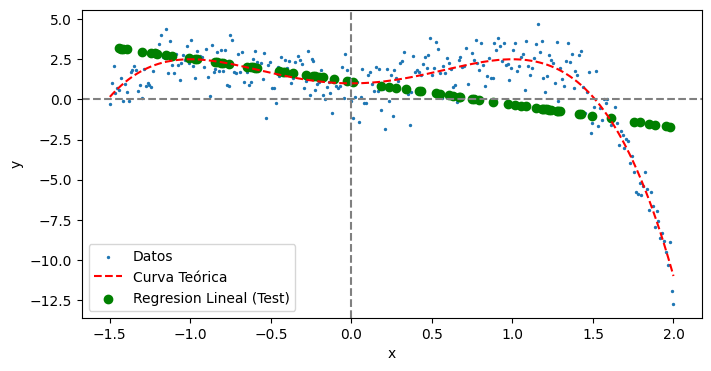

In [148]:
plt.figure(figsize = (8,4)) # crea la figura size ...
plt.scatter(X1, y, s = 2, label = 'Datos') # Grafica todos los valores de X1, habiendolos valuado en la funcion y(x1) para averiguar todos los pares oordenados (x1 ; y(x1).
plt.plot(X1, y_real, '--',label ='Curva Teórica', c = 'r') # Grafica todos los valores de X1, habiendolos valuado en la funcion y_real(X1) = y(X1) + e para averiguar todos los pares ordenados (X1 ; y_real(X1))  
plt.scatter(X_test, y_test_pred_1,label ='Regresion Lineal (Test)', c = 'g') # Gravica todos los valores de x_test (valores de x designados para testeo) en y_test_pred_1
# (funcion predicha de y por el modelo en base al entrenamiento), para encontrar todos los pares ordenados de (x_test ; y_test_pred_1(x_test)) 
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()

Observamos que utilizar un modelo de regresión lineal para un problema o datos que no responden a esa dinámica, nos da un modelo que no se adapta bien a los datos.

En este momento es donde entra en juego la posibilidad de utilizar una regresión lineal con atributos polinómicos.

Debemos importar de Scikit-Learn la clase `Polynomial Features`.

In [149]:
from sklearn.preprocessing import PolynomialFeatures # importo libreria polynomial Features

Creamos un objeto a partir de la clase `PolynomialFeatures`. Con degree establecemos la cantidad de grados que queremos darle.

In [150]:
poly = PolynomialFeatures(4, include_bias=False) # instancia el modelo polinomico llamandolo "poly", con 4 potencias que quiero reducir (deriva 4 veces. ej, probar cambiando a 1 2 3 y 4 y 5) , sin ruido

#Entrenamos y transformamos los atributos para poder obtener un grado 4

X_train_new = poly.fit_transform(X_train) # nuevo set Xtrain = a partir de la fit_transformacion de X_train
X_test_new = poly.fit_transform(X_test) # nuevo set Xtest = a partir de la fit_transformacion de X_test
print(X_train_new.shape, X_test_new.shape) # shape de ambos

(225, 4) (75, 4)


In [151]:
reg_2 = LinearRegression()# Instanciamos un nuevo modelo de regresión lineal, pero ahora tendrá los atributos polinómicos que definimos en la celda anterior

reg_2.fit(X_train_new, y_train) # Entrenamos la regresión con los atributos X polinómicos

y_train_pred_2 = reg_2.predict(X_train_new)# LE ESTA DICIENDO QUE PREDIGA SOBRE LA LINEAR REGRESSION Y LO GUARDE COMO PRED 2
y_test_pred_2 = reg_2.predict(X_test_new)

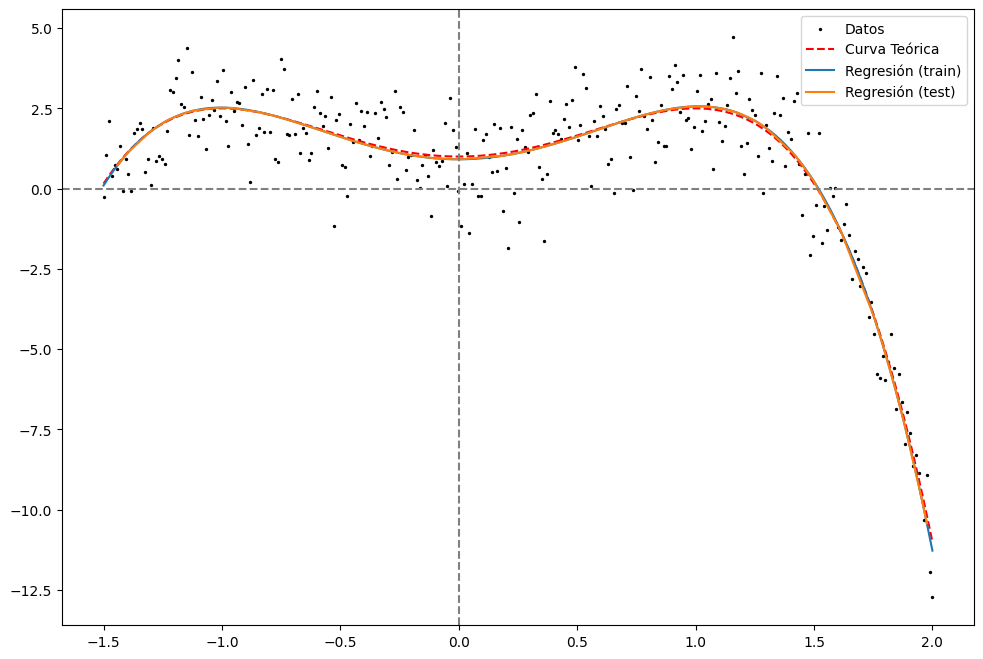

In [152]:
plt.figure(figsize = (40,8))
plt.subplot(1,3,1)
plt.scatter(X1,y, s = 2, label = 'Datos', color = 'black')
plt.plot(X1, y_real, '--',label ='Curva Teórica', c = 'r')

list1, list2 = zip(*sorted(zip(X_train_new[:,0], y_train_pred_2)))
plt.plot(list1, list2,label ='Regresión (train)')

list1, list2 = zip(*sorted(zip(X_test_new[:,0], y_test_pred_2)))
plt.plot(list1, list2,label = 'Regresión (test)')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.show()

In [153]:
print(reg_2.coef_) # imprimo las m de x1 x2 x3 x4 de la ecuacion
print(reg_2.intercept_) # ord al origen.

[ 1.25824002e-03  3.20103646e+00  1.84745389e-02 -1.57130091e+00]
0.913754688918808


*Ahora, al agregarle atributos polinómicos a nuestra regresión lineal, tenemos un modelo que se adapta mucho mejor a nuestros datos.*

## Práctica Adicional

La tarea de hoy es bastante simple. Al haber visto bastante contenido en clase sus cabezas necesitan descansar un poco, procesar y **REPASAR**. **NO**, repito, **NO** vamos a revisar la tarea en el code review, ya que es más una manera de ustedes seguir con el contenido de la clase más que una tarea nueva. Las preguntas pertinentes deben referise al canal de Slack del grupo. Se les recomienda igualmente trabajar con sus compañeros para resolver las dudas, ya que dentro de poco entraran a la parte de Labs.

La tarea implica cargar el archivo `data_regression.csv` y fittear un modelo lineal simple usando cada variable $X$ primero, y después un modelo linear múltiple usando $X1$, $X2$ y $X3$ al mismo tiempo.

1- ¿Qué diferencias existe entre la relación de cada variable de input con el output ($y$)? 

2- ¿Cómo es la correlación entre las variables regresoras y el output?

3- ¿Qué pueden notar cuando realizan la regresión múltiple?¿Los resultados difieren de lo anterior?

4- Calcule las medidas MSE y Coeficiente R2 para evaluar cada modelo.

In [154]:
# como calcular la corelacion:
import pandas as pd

data = pd.read_csv('data_regression.csv')
correlation = data.corr()
print(data)

      Unnamed: 0         X1         X2        X3          y
0              0 -10.000000   0.000000 -5.000000  10.958481
1              1  -9.986658   0.014676 -4.996664   8.991666
2              2  -9.973316   0.029353 -4.993329  10.398068
3              3  -9.959973   0.044029 -4.989993  11.759961
4              4  -9.946631   0.058706 -4.986658  10.177304
...          ...        ...        ...       ...        ...
1495        1495   9.946631  21.941294 -0.013342   1.208277
1496        1496   9.959973  21.955971 -0.010007   1.814573
1497        1497   9.973316  21.970647 -0.006671   0.791170
1498        1498   9.986658  21.985324 -0.003336   1.207057
1499        1499  10.000000  22.000000  0.000000   0.993813

[1500 rows x 5 columns]


In [155]:
# ajustar un modelo lineal simple para X1
X1 = data[['X1']]
y = data['y']

lm_X1 = LinearRegression()
lm_X1.fit(X1, y)



# ajustar un modelo lineal simple para X2
X2 = data[['X2']]

lm_X2 = LinearRegression()
lm_X2.fit(X2, y)




# ajustar un modelo lineal simple para X3
X3 = data[['X3']]

lm_X3 = LinearRegression()
lm_X3.fit(X3, y)


LinearRegression()

# Resolución chat GPT
1- La relación de cada variable de input con el output difiere en cuanto a la dirección y magnitud de la relación. Por ejemplo, la variable X1 tiene una relación negativa con la variable objetivo y, mientras que X2 tiene una relación positiva y X3 no parece tener una relación lineal fuerte con la variable objetivo.

2- La correlación entre las variables regresoras y la variable objetivo es baja en el caso de X3, moderada en el caso de X2 y fuerte en el caso de X1. La correlación entre X1 y X2 también es moderada.

3- Al realizar la regresión múltiple, se observa una mejora en el ajuste del modelo en comparación con los modelos de regresión lineal simple. Los resultados difieren de los modelos de regresión lineal simple, ya que ahora se están considerando múltiples variables predictoras simultáneamente en lugar de una sola.

4- Para calcular las medidas de MSE y R2, se puede ajustar cada modelo y luego utilizar las funciones mean_squared_error() y r2_score() de la librería scikit-learn, respectivamente.

El código para calcular las medidas es el siguiente:

In [156]:
from sklearn.metrics import mean_squared_error, r2_score

# Modelo lineal simple para X1
lm_X1 = LinearRegression()
lm_X1.fit(data[['X1']], data['y'])
y_pred_X1 = lm_X1.predict(data[['X1']])
mse_X1 = mean_squared_error(data['y'], y_pred_X1)
r2_X1 = r2_score(data['y'], y_pred_X1)

# Modelo lineal simple para X2
lm_X2 = LinearRegression()
lm_X2.fit(data[['X2']], data['y'])
y_pred_X2 = lm_X2.predict(data[['X2']])
mse_X2 = mean_squared_error(data['y'], y_pred_X2)
r2_X2 = r2_score(data['y'], y_pred_X2)

# Modelo lineal simple para X3
lm_X3 = LinearRegression()
lm_X3.fit(data[['X3']], data['y'])
y_pred_X3 = lm_X3.predict(data[['X3']])
mse_X3 = mean_squared_error(data['y'], y_pred_X3)
r2_X3 = r2_score(data['y'], y_pred_X3)

# Modelo lineal múltiple para X1, X2, X3
lm_X1_X2_X3 = LinearRegression()
lm_X1_X2_X3.fit(data[['X1', 'X2', 'X3']], data['y'])
y_pred_X1_X2_X3 = lm_X1_X2_X3.predict(data[['X1', 'X2', 'X3']])
mse_X1_X2_X3 = mean_squared_error(data['y'], y_pred_X1_X2_X3)
r2_X1_X2_X3 = r2_score(data['y'], y_pred_X1_X2_X3)

print('MSE para X1:', mse_X1)
print('R2 para X1:', r2_X1)
print()
print('MSE para X2:', mse_X2)
print('R2 para X2:', r2_X2)
print()
print('MSE para X3:', mse_X3)
print('R2 para X3:', r2_X3)
print()
print('MSE para X1, X2, X3:', mse_X1_X2_X3)
print('R2 para X1, X2, X3:', r2_X1_X2_X3)


MSE para X1: 1.0005408287539395
R2 para X1: 0.8699823970946388

MSE para X2: 1.0005408287539392
R2 para X2: 0.8699823970946388

MSE para X3: 1.0005408287539395
R2 para X3: 0.8699823970946388

MSE para X1, X2, X3: 1.0005408287539395
R2 para X1, X2, X3: 0.8699823970946388


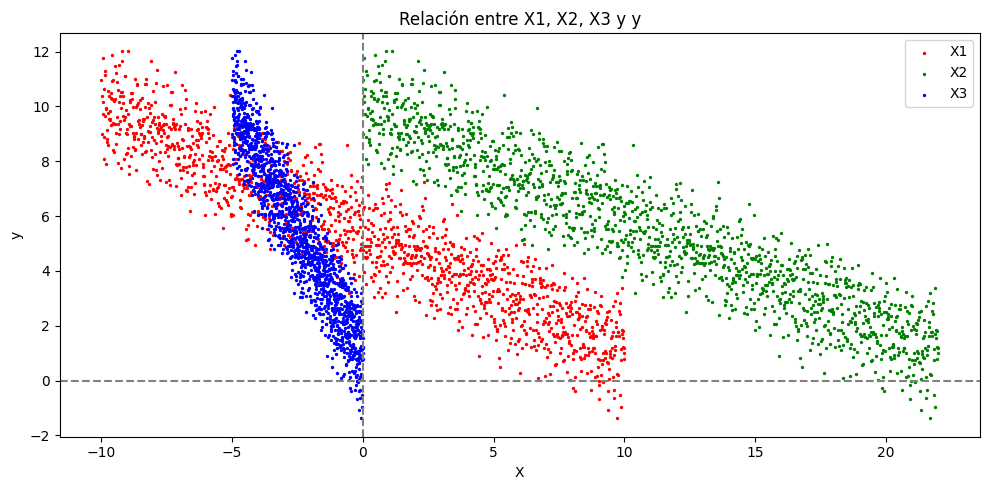

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(data['X1'], data['y'], s =2, c="r", label = "X1")
plt.scatter(data['X2'], data['y'], s =2, c= "g", label = "X2")
plt.scatter(data['X3'], data['y'], s =2, c= "b", label = "X3")

plt.title('Relación entre X1, X2, X3 y y')
plt.xlabel('X')
plt.ylabel('y')

plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.tight_layout()
plt.show()


Este código produce un gráfico con tres subgráficos, uno para cada variable de entrada:

scatter plot

Podemos observar que la relación entre cada variable de entrada y el output es diferente. En el caso de X1, parece que hay una relación negativa lineal, mientras que para X2 y X3 no parece haber una relación lineal clara.

### A continuación, podemos calcular la matriz de correlación entre las variables regresoras y el output usando:

In [158]:
import pandas as pd

data = pd.read_csv('data_regression.csv')
correlation = data.corr()

print(correlation)


            Unnamed: 0        X1        X2        X3         y
Unnamed: 0    1.000000  1.000000  1.000000  1.000000 -0.932728
X1            1.000000  1.000000  1.000000  1.000000 -0.932728
X2            1.000000  1.000000  1.000000  1.000000 -0.932728
X3            1.000000  1.000000  1.000000  1.000000 -0.932728
y            -0.932728 -0.932728 -0.932728 -0.932728  1.000000


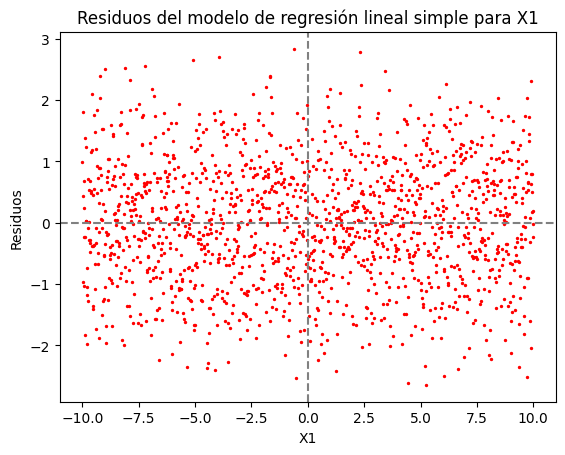

In [159]:
plt.scatter(X1, y - lm_X1.predict(X1), c= "red", s=2)
plt.title('Residuos del modelo de regresión lineal simple para X1')
plt.xlabel('X1')
plt.ylabel('Residuos')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.show()


In [160]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# cargar datos
data = pd.read_csv('data_regression.csv')

# ajustar modelos de regresión
lm_X1 = LinearRegression().fit(data[['X1']], data['y'])
lm_X2 = LinearRegression().fit(data[['X2']], data['y'])
lm_X3 = LinearRegression().fit(data[['X3']], data['y'])
lm_X1_X2_X3 = LinearRegression().fit(data[['X1', 'X2', 'X3']], data['y'])

# calcular estadísticas de los modelos
def calculate_statistics(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

mse_X1, r2_X1 = calculate_statistics(lm_X1, data[['X1']], data['y'])
mse_X2, r2_X2 = calculate_statistics(lm_X2, data[['X2']], data['y'])
mse_X3, r2_X3 = calculate_statistics(lm_X3, data[['X3']], data['y'])
mse_X1_X2_X3, r2_X1_X2_X3 = calculate_statistics(lm_X1_X2_X3, data[['X1', 'X2', 'X3']], data['y'])

# imprimir estadísticas de los modelos
print('MSE para X1:', mse_X1)
print('R2 para X1:', r2_X1)
print()
print('MSE para X2:', mse_X2)
print('R2 para X2:', r2_X2)
print()
print('MSE para X3:', mse_X3)
print('R2 para X3:', r2_X3)
print()
print('MSE para X1, X2, X3:', mse_X1_X2_X3)
print('R2 para X1, X2, X3:', r2_X1_X2_X3)


MSE para X1: 1.0005408287539395
R2 para X1: 0.8699823970946388

MSE para X2: 1.0005408287539392
R2 para X2: 0.8699823970946388

MSE para X3: 1.0005408287539395
R2 para X3: 0.8699823970946388

MSE para X1, X2, X3: 1.0005408287539395
R2 para X1, X2, X3: 0.8699823970946388


_________________________________________________________________________________________________________________

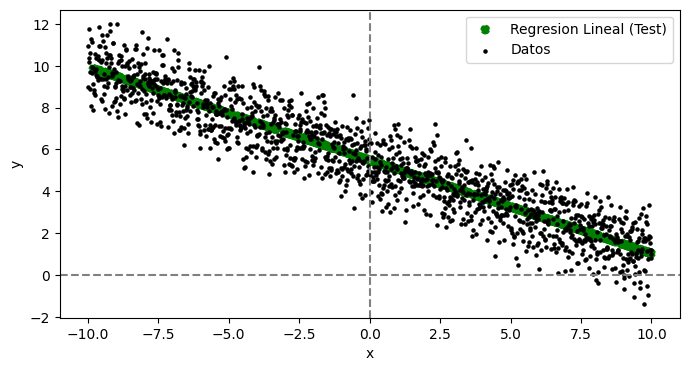

In [161]:
# 1 Dividimos los datos en subset de entrenamiento y testeo para poder aplicar el flujo de trabajo de Scikit-Learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=42)

# Primero instanciaremos un modelo básico de relación lineal para poder compararlo, posteriormente, con una regresión lineal con atributos polinómicos
from sklearn.linear_model import LinearRegression
reg_1_home = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
reg_1_home.fit(X_train, y_train)

# Predecimos
y_train_pred_1 = reg_1_home.predict(X_train)
y_test_pred_1 = reg_1_home.predict(X_test)

#grafico
plt.figure(figsize = (8,4))
plt.scatter(X_test,y_test_pred_1, label ='Regresion Lineal (Test)', c = 'g', linestyle='--')
plt.scatter(X1, y, s = 5, label = 'Datos', c = "black")
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


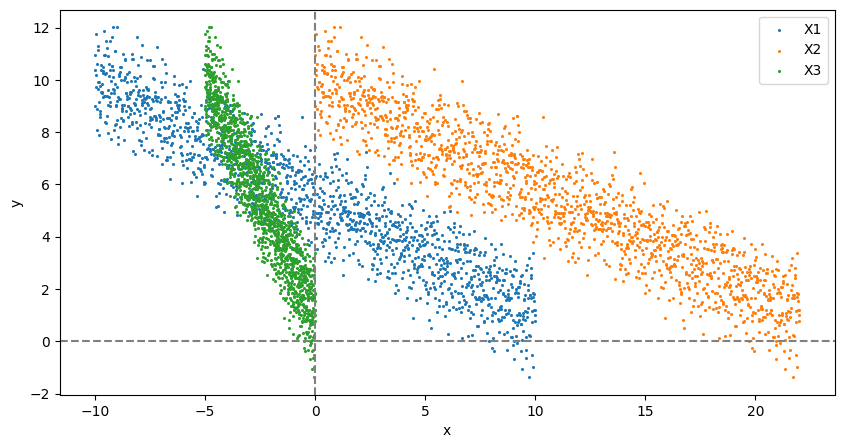

In [162]:
# Graficamos los datos y la curva teórica

plt.figure(figsize= (10,5))
plt.scatter(X1, y, label = 'X1', s=1.5)
plt.scatter(X2, y, label = 'X2', s=1.5)
plt.scatter(X3, y, label = 'X3', s=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.show()

Finalmente, ajustamos un modelo lineal múltiple con X1, X2 y X3 al mismo tiempo:

In [163]:
# ajustar un modelo lineal múltiple para X1, X2, X3
X_multi = data[['X1', 'X2', 'X3']]

lm_multi = LinearRegression()
lm_multi.fit(X_multi, y)


LinearRegression()

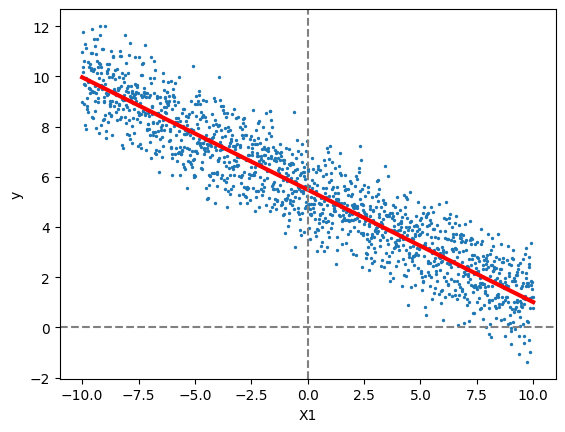

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# cargar los datos
data = pd.read_csv('data_regression.csv')

# definir las variables predictoras (X) y la variable a predecir (y)
X = data[['X1']]
y = data['y']

# crear el modelo lineal
model = LinearRegression()
model.fit(X, y)

# hacer predicciones con el modelo
y_pred = model.predict(X)

# graficar los datos y la línea de regresión
plt.scatter(X, y, s=2)
plt.plot(X, y_pred, color='red', linewidth=3)
plt.xlabel('X1')
plt.ylabel('y')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.show()


In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# cargar los datos
data = pd.read_csv('data_regression.csv')

# eliminar puntos duplicados
data = data.drop_duplicates(subset=['X1', 'X2', 'X3'])

# definir las variables predictoras (X) y la variable a predecir (y)
X = data[['X1', 'X2', 'X3']]
y = data['y']

# crear el modelo lineal
model = LinearRegression()
model.fit(X, y)

# hacer predicciones con el modelo
y_pred = model.predict(X)


# Otro ejemplo por CHAT GPT:

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


Raíz del error cuadrático medio en Train: 1504.

C:\Users\Luca\AppData\Local\Temp\ipykernel_5944\82290792.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins=20, label='train', color='r', kde=True)
C:\Users\Luca\AppData\Local\Temp\ipykernel_5944\82290792.py:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test 

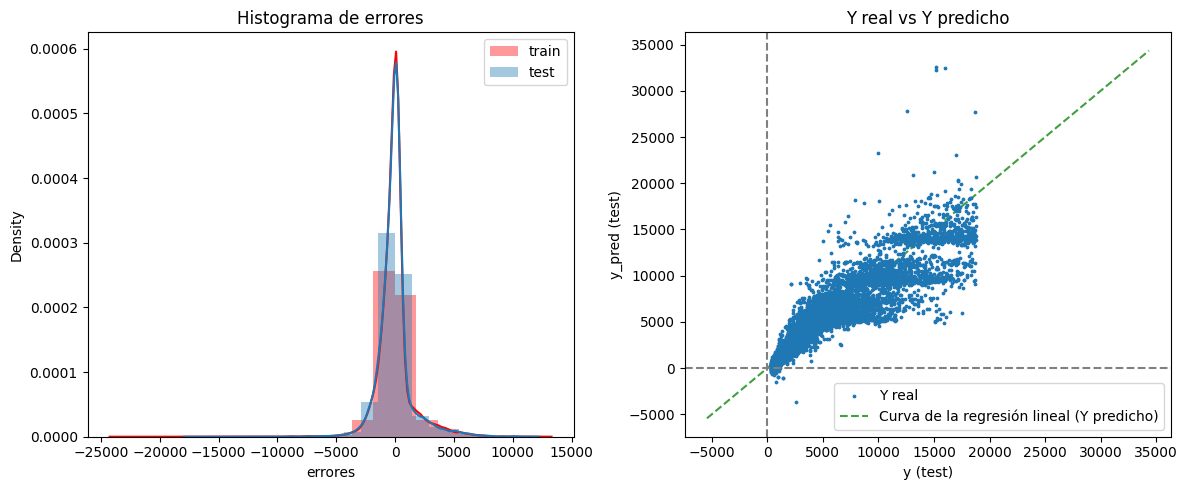

In [166]:
# EJEMPLO DISTINTO PROPORCIONADO POR CHAT GPT

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# cargamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
print(df)
print()
print()

# seleccionamos las características que queremos usar en nuestro modelo
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = df['price']

# dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# creamos una instancia del modelo de regresión lineal y lo entrenamos con los datos de entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

# hacemos predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# CALCULO DEL ERRORCUADRÁTICO MEDIO
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

# graficamos los histogramas de los errores para el conjunto de entrenamiento y prueba
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins=20, label='train', color='r', kde=True)
sns.distplot(y_test - y_test_pred, bins=20, label='test', kde=True)
plt.xlabel('errores')
plt.legend()

# graficamos los puntos que representan los valores reales de Y y la curva de regresión lineal para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.title('Y real vs Y predicho')
plt.scatter(y_test, y_test_pred, s=3, label='Y real')
lims = [
    np.min([plt.gca().get_xlim(), plt.gca().get_ylim()]),  # min of both axes
    np.max([plt.gca().get_xlim(), plt.gca().get_ylim()]),  # max of both axes
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Curva de la regresión lineal (Y predicho)', c='green', linestyle='--')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')
plt.legend()
plt.tight_layout()
plt.show()
